# **Exploring Errors in Regression**

This project studies regression of data whose underlying function varies from linear to very nonlinear using methods with different flexibility. From the class, we learned that the mean-squared errors $MSE$ is given as:



$
\begin{align}
E(y_0-\hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + Bias[(\hat{f}(x_0))]^2 + Var(\epsilon)
\end{align}
$


where $Var(\hat{f})$ is the *Variance*, which refers to the amount by which $\hat{f}$ would change if we estimated it using a different training set; $Bias(\hat{f}) = E(\hat{f}) - f$ is the $Bias$, which refers to the error that is introduced by approximating a complicated real-life problem by a much simper model; and $Var(\epsilon)$ is the irreducible error. We will study the bias-variance tradeoff for different methods on different data.


**Data Generation:** I will be generating data using the following models. Let $y = f(x) + \epsilon$, where $\epsilon$ is the random noise (e.g. Gaussian) and $f(x)$ has three forms as:
1. A linear function $f(x) = ax + b$;
2. A quadratic function $f(x) = ax^2 + bx + c$;
3. A nonlinear function: e.g. $f(x) = x\sin(x)$, $f(x) = \frac{1}{1 + 25x^2}$ 
</br></br>
<ins>NOTE</ins>: I will be picking a domain and deciding how many data points to produce. I will be splitting my data into the training set and the test set randomly and so validation can be performed. For the random noise, I will be controlling the mean and variance.


**Regression Models:** I will use three regression methods to fit the data.
1. $Y = \beta_0 + \beta_1X$  $(df=2)$;
2. A smoothing cubic spline with degree of freedom 5;
3. A smoothing cubic spline with effective degree of freedom approximately 25. (<ins>NOTE</ins>: for smoothing spline I will adjust the smoothing parameters to control the level of flexibility or degree of freedom.)

**Research Objective:** I will use my data and methods to investigate the following topics.
1. The performance of methods with different flexibility on data from linear to nonlinear underlying functions.
2. How does the $MSE$, $Bias$, and $Var$ vary with method of different flexibility?
3. How does the variance of noise affect the performance of different method (e.g. similar to (1) but with a different noise level characterized by the variance). I will use the nonlinear data with different noise levels fitted by three methods, plot the model and calculate training $MSE$ and test $MSE$.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stats
from csaps import csaps 
from sklearn.model_selection import train_test_split

### **Data Generation**

To generate data, I will first be establishing the true population models that I will be using to arbitrarily make predictions using various regression techniques. Here are my three functions:

**Linear Model:** $f(x) = 10.73x + 3400$ </br>
**Quadratic Model:** $f(x) = 10.73x^2 -5.00x + 3400$ </br>
**Non-linear Model:** $f(x) = \frac{440x^2\arctan(\frac{1}{x + 1})\cos(\frac{x}{100})}{(x+1)^{1.8}}$ </br>

The reason why I am using multiple models of varying complexities is because I want to observe exactly how our Regression methods react to different patterns of data. Depending on the flexibility and bias, smoothing spline with a high degree of freedom for example might have a much more severe reaction to a more complex non-linear $f$ than a simple linear regression model would.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


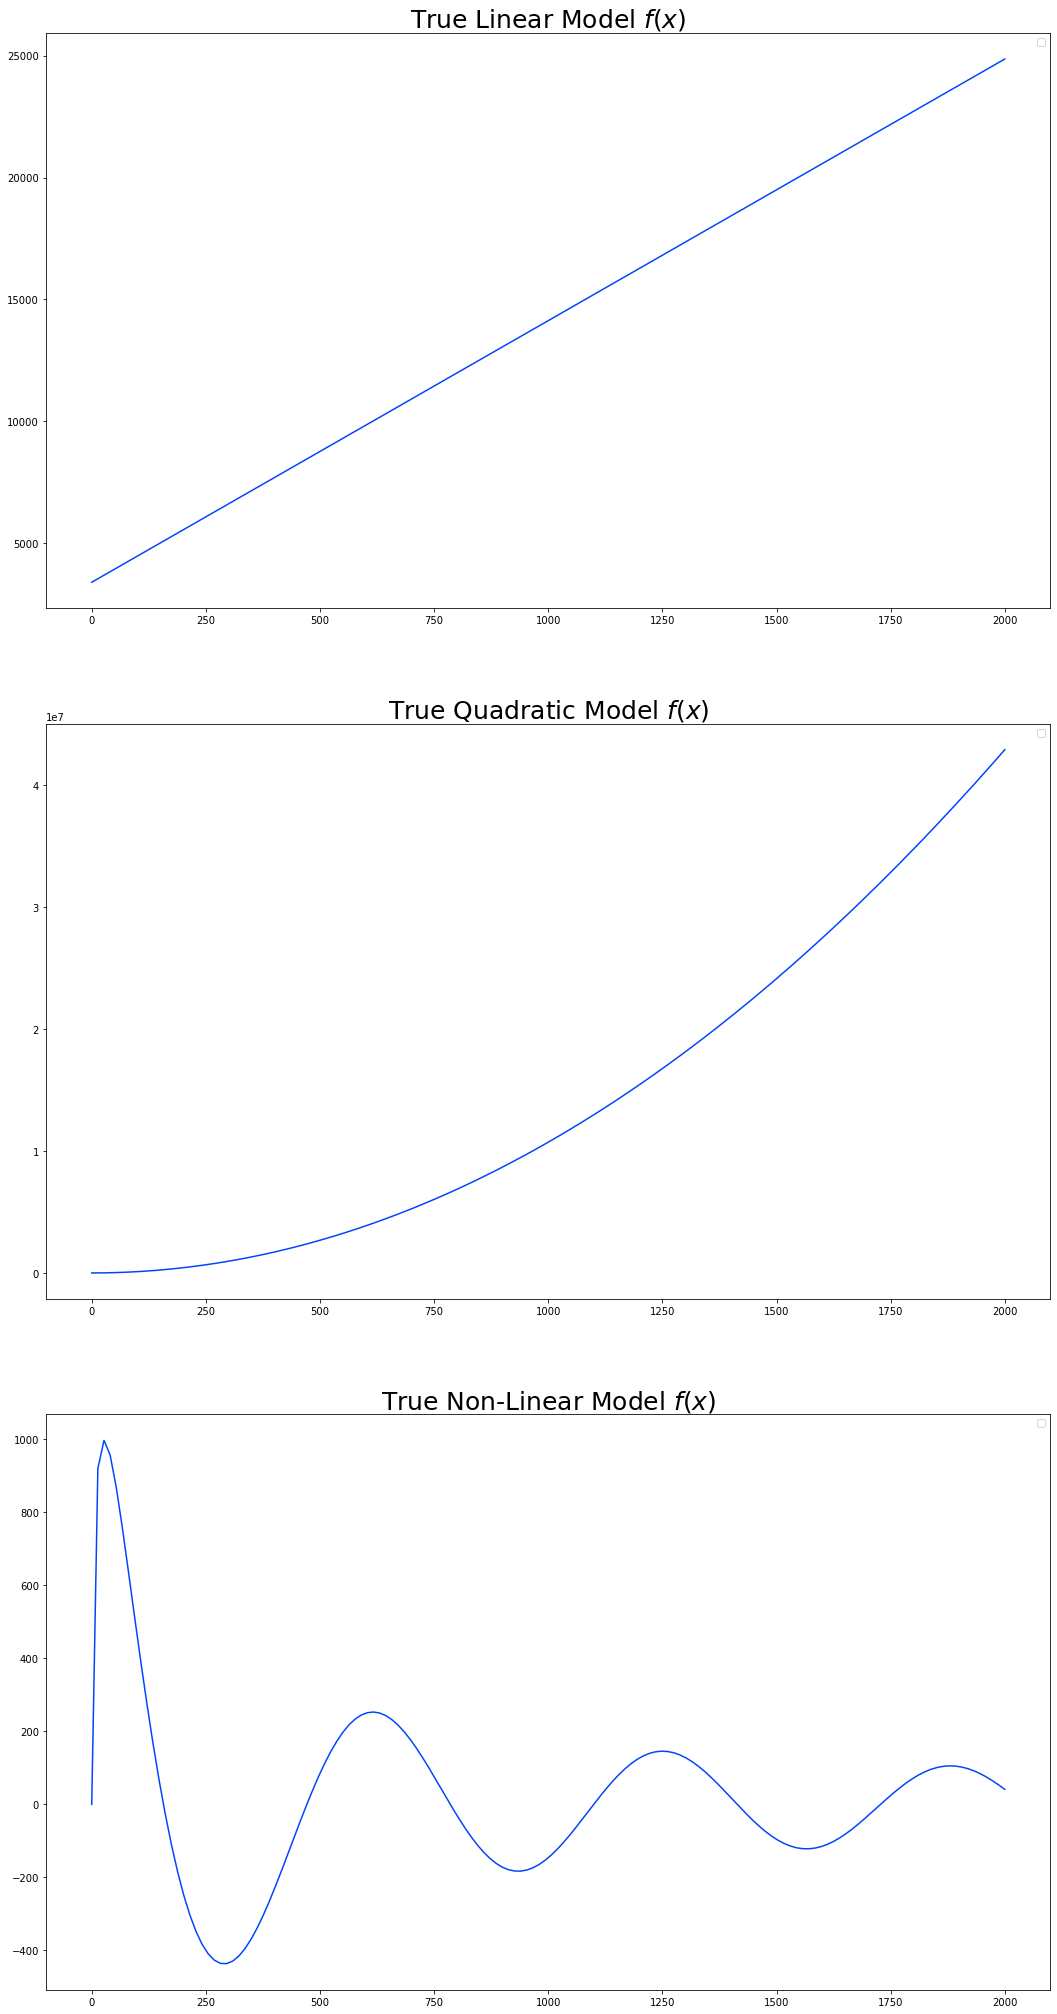

In [51]:
# Data count
n = 150

# x_values denotes the values of our independent variables
x_values = np.linspace(0,2000,n)

# Underlying functions of data for linear, quadratic, and nonlinear cases
f_linear    = lambda x : 10.73*(x) + 3400
f_quadratic = lambda x : 10.73*(x**2) - 5*(x) + 3400
f_nonlinear = lambda x : (440 * (x**2) * np.arctan(100/((x + 1))) * np.cos(x/100) / (x + 1)**1.8)

# Create "noisy" data randomly using arbritrary mean and stdev parameters
mean = 968.12
stdev = 233.91
y_linear = f_linear(x_values)

# Plot the true graphs 
fig, ax = plt.subplots(3, figsize=(18,36))

ax[0].plot(x_values, f_linear(x_values), markersize=200, color="#0044FF")
ax[0].set_title(r"True Linear Model $f(x)$", size=25)
ax[0].legend()

ax[1].plot(x_values, f_quadratic(x_values), markersize=200, color="#0044FF")
ax[1].set_title(r"True Quadratic Model $f(x)$", size=25)
ax[1].legend()

ax[2].plot(x_values, f_nonlinear(x_values), markersize=200, color="#0044FF")
ax[2].set_title(r"True Non-Linear Model $f(x)$", size=25)
ax[2].legend()


## References
[1]  https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/ </br>
[2] https://stackabuse.com/matplotlib-scatter-plot-with-distribution-plots-histograms-jointplot/
